In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

dataset_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
df = pd.read_csv(dataset_url, compression="zip")
df.shape

(420551, 15)

## 1. Pré-processamento dos dados

O nosso conjunto de dados possui 420.551 registros e 15 colunas. As colunas são:

- `Date Time`: Data e hora da medição
- `p (mbar)`: A unidade de pressão derivada do SI pascal usada para quantificar a pressão interna. Os relatórios meteorológicos normalmente indicam a pressão atmosférica em milibares.
- `T (degC)`: Temperatura em graus Celsius
- `Tpot (K)`: Temperatura potencial em K
- `Tdew (degC)`: Temperatura em Celsius em relação à umidade. O Ponto de Orvalho é uma medida da quantidade absoluta de água no ar, o DP é a temperatura na qual o ar não consegue reter toda a umidade e a água se condensa.
- `rh (%)`: A Umidade Relativa é uma medida de quão saturado o ar está com vapor de água, o% UR determina a quantidade de água contida nos objetos da coleção.
- `VPmax (mbar)`: Pressão de vapor de saturação
- `VPact (mbar)`: Pressão de vapor
- `VPdef (mbar)`: Pressão de vapor deficit
- `sh (g/kg)`: Umidade específica em g/kg
- `H2OC (mmol/mol)`: Concentração de vapor de água em mmol/mol
- `rho (g/m**3)`: Densidade do ar em g/m**3
- `wv (m/s)`: Velocidade do vento em m/s
- `max. wv (m/s)`: Velocidade máxima do vento em m/s
- `wd (deg)`: Direção do vento em graus

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


A coluna `Date Time` é do tipo `object` e as demais são do tipo `float64`. Começamos dando uma olhada nas primeiras e últimas linhas do conjunto de dados.

In [3]:
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

In [4]:
df.tail()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
420546  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
420547  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
420548  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
420549  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
420550  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
420546   73.10          4.52          3.30          1.22       2.06   
420547   69.71          4.77          3.32          1.44       2.07   
420548   67.91          4.84          3.28          1.55       2.05   
420549   71.80          4.46          3.20          1.26       1.99   
420550   75.70          4.27          3.23          1.04       2.01   

        H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
420546             3.30       1292.98      0.67           1.52     240.0  
420547             3.32       1289.44      1.14           1.92     234.3  
420548             3.28       1288.39      1.08           2.00     215.2  
420549             3.20       1293.56      1.49           2.16     225.8  
420550             3.23       1296.38      1.23           1.96     184.9

O tipo das colunas também pode ser verificado com o método `dtypes`. O código 'O' representa o tipo `object`, abaixo temos a tabela de correspondência dos tipos de dados extraída da [documentação do numpy](https://numpy.org/doc/stable/reference/generated/numpy.dtype.kind.html).

<center>

| Caractere | Tipo de Dados |
|-----------|---------------|
| b         | boolean       |
| i         | signed integer|
| u         | unsigned integer|
| f         | floating-point|
| c         | complex floating-point|
| m         | timedelta     |
| M         | datetime      |
| O         | object        |
| S         | (byte-)string |
| U         | Unicode       |
| V         | void          |


</center>


In [5]:
df["Date Time"].dtypes  # 'O' significa que é um objeto

dtype('O')

Verificamos que a coluna `Date Time` não foi reconhecida como uma data, então vamos convertê-la para o tipo `datetime` com o método `pd.to_datetime`. Para converter no formato adequado, usamos a referência [strftime.org](https://strftime.org/). Há vários formatos de data e hora, normalmente usamos `%Y` para o representar o ano com 4 dígitos, `%m` para o mês, `%d` para o dia, `%H` para a hora em formato 24 horas, `%M` para os minutos e `%S` para os segundos. 

Exemplos:

- `2024-03-01 23:59:59` é representado por `%Y-%m-%d %H:%M:%S`
- `2024-03-01` é representado por `%Y-%m-%d`
- `23:59:59` é representado por `%H:%M:%S`

Ao visualizar as primeiras e últimas linhas do conjunto de dados, percebemos que a coluna `Date Time` está no formato `DD.MM.YYYY HH:MM:SS`.

In [6]:
df["Date Time"].str.len().value_counts()  # todos os valores tem 19 caracteres

19    420551
Name: Date Time, dtype: int64

In [7]:
df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")
df.dtypes  # datetime64[ns]

Date Time          datetime64[ns]
p (mbar)                  float64
T (degC)                  float64
Tpot (K)                  float64
Tdew (degC)               float64
rh (%)                    float64
VPmax (mbar)              float64
VPact (mbar)              float64
VPdef (mbar)              float64
sh (g/kg)                 float64
H2OC (mmol/mol)           float64
rho (g/m**3)              float64
wv (m/s)                  float64
max. wv (m/s)             float64
wd (deg)                  float64
dtype: object

Vemos que a coluna `Date Time` foi convertida para o tipo `datetime64[ns]`. Nós esperamos que os valores do dia estejam entre 1 e 31, pois as medições foram feitas diariamente, logo, o histograma dos dias deve ser aproximadamente uniforme com um pequeno desvio devido a meses com 30 ou 31 dias.

<Axes: ylabel='Frequency'>

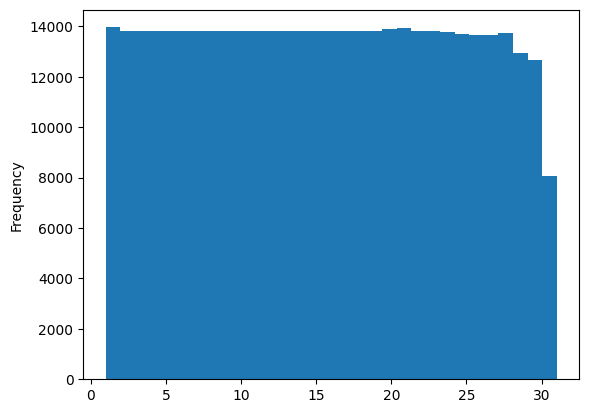

In [8]:
df["Date Time"].dt.day.plot(kind="hist", bins=31)

Verificamos a presença de valores nulos com o método `isnull().sum()`. Não há valores nulos no conjunto de dados.

In [9]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

Em seguida, verificamos a presença de valores duplicados com o método `duplicated().sum()`. Há 327 valores duplicados no conjunto de dados.

In [10]:
df.duplicated().sum()  # 327 valores duplicados

327

Notamos que há 327 valores duplicados no conjunto de dados, provavelmente devido a medições feitas no mesmo instante de tempo. Vamos remover esses valores duplicados com o método `drop_duplicates`.

In [11]:
df = df.drop_duplicates()
df.shape  # (420224, 15)

(420224, 15)

As distribuição dos dias é aproximadamente uniforme como esperado. Em seguida, verificamos se há valores nulos no conjunto de dados.

In [12]:
df.describe()

p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420224.000000  420224.000000  420224.000000  420224.000000   
mean      989.214157       9.442421     283.484880       4.953472   
std         8.360888       8.421135       8.502206       6.731171   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.230000   
50%       989.580000       9.400000     283.460000       5.210000   
75%       994.730000      15.460000     289.520000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420224.000000  420224.000000  420224.000000  420224.000000   
mean       76.028738      13.568642       9.532333       4.036225   
std        16.460467       7.734770       4.183996       4.891287   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.240000       7.770000       6.210000       0.870000   
50%        79.300000      11.810000       8.860000       2.180000   
75%        89.400000      17.590000      12.350000       5.290000   
max       100.000000      63.770000      28.320000      46.010000   

           sh (g/kg)  H2OC (mmol/mol)   rho (g/m**3)       wv (m/s)  \
count  420224.000000    420224.000000  420224.000000  420224.000000   
mean        6.021503         9.638778    1216.097805       1.700930   
std         2.656043         4.235244      39.967936      65.472111   
min         0.500000         0.800000    1059.450000   -9999.000000   
25%         3.920000         6.280000    1187.540000       0.990000   
50%         5.590000         8.960000    1213.830000       1.760000   
75%         7.800000        12.480000    1242.790000       2.860000   
max        18.130000        28.820000    1393.540000      28.490000   

       max. wv (m/s)       wd (deg)  
count  420224.000000  420224.000000  
mean        3.054884     174.748064  
std        69.043660      86.685323  
min     -9999.000000       0.000000  
25%         1.760000     124.900000  
50%         2.960000     198.100000  
75%         4.730000     234.100000  
max        23.500000     360.000000

Notamos que não há valores nulos no conjunto de dados e que há variás variáveis com média e a mediana próximas, o que pode indicar que as distribuições são provavelmente aproxidamente simétricas, na próxima seção vamos verificar isso. Além disso, podemos perceber que as variáveis `wv (m/s)` e `max. wv (m/s)` contém valores extremamente baixos como -9999, primeiro vamos verificar os registros que contém esses valores. Todos os registros aconteceram no dia 13/07/2015 entre 09:00 e 12:10.

In [14]:
df.loc[(df["wv (m/s)"] == -9999) | (df["max. wv (m/s)"] == -9999)]

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
343577 2015-07-13 09:00:00    990.52     16.98    290.93        12.94   77.10   
343578 2015-07-13 09:10:00    990.49     16.85    290.80        12.78   76.90   
343579 2015-07-13 09:20:00    990.32     17.06    291.03        12.86   76.30   
343580 2015-07-13 09:30:00    990.24     17.43    291.41        12.75   74.00   
343581 2015-07-13 09:40:00    990.27     17.71    291.68        12.88   73.30   
343582 2015-07-13 09:50:00    990.28     17.76    291.73        13.03   73.80   
343583 2015-07-13 10:00:00    990.20     17.98    291.96        12.74   71.40   
343584 2015-07-13 10:10:00    990.17     18.19    292.17        12.59   69.78   
343585 2015-07-13 10:20:00    990.07     18.31    292.30        12.97   71.00   
343586 2015-07-13 10:30:00    990.02     18.24    292.24        12.88   70.90   
343587 2015-07-13 10:40:00    989.96     18.36    292.36        12.76   69.84   
343588 2015-07-13 10:50:00    989.98     18.63    292.63        12.65   68.15   
343589 2015-07-13 11:00:00    990.16     18.71    292.70        12.48   67.07   
343590 2015-07-13 11:10:00    990.34     18.65    292.62        12.44   67.15   
343591 2015-07-13 11:20:00    990.18     18.52    292.50        12.50   67.94   
343592 2015-07-13 11:30:00    990.16     18.66    292.65        12.42   67.03   
343593 2015-07-13 11:40:00    990.20     18.67    292.65        12.10   65.55   
343594 2015-07-13 11:50:00    990.16     18.64    292.63        12.18   66.05   
343595 2015-07-13 12:00:00    990.15     18.75    292.74        12.27   65.97   
343596 2015-07-13 12:10:00    990.15     18.80    292.79        12.51   66.83   

        VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
343577         19.38         14.94          4.44       9.44            15.09   
343578         19.22         14.78          4.44       9.34            14.92   
343579         19.48         14.86          4.62       9.39            15.01   
343580         19.94         14.76          5.19       9.32            14.90   
343581         20.30         14.88          5.42       9.40            15.02   
343582         20.36         15.03          5.33       9.49            15.17   
343583         20.65         14.74          5.90       9.31            14.89   
343584         20.92         14.60          6.32       9.22            14.74   
343585         21.08         14.97          6.11       9.46            15.12   
343586         20.99         14.88          6.11       9.40            15.03   
343587         21.14         14.77          6.38       9.33            14.92   
343588         21.51         14.66          6.85       9.26            14.80   
343589         21.61         14.50          7.12       9.16            14.64   
343590         21.53         14.46          7.07       9.13            14.60   
343591         21.36         14.51          6.85       9.17            14.65   
343592         21.55         14.44          7.10       9.12            14.59   
343593         21.56         14.13          7.43       8.93            14.27   
343594         21.52         14.21          7.31       8.98            14.35   
343595         21.67         14.29          7.37       9.03            14.44   
343596         21.74         14.53          7.21       9.18            14.67   

        rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
343577       1182.50      6.16        -9999.0     289.6  
343578       1183.06  -9999.00        -9999.0     359.7  
343579       1181.97  -9999.00        -9999.0     359.8  
343580       1180.42  -9999.00        -9999.0     359.8  
343581       1179.26  -9999.00        -9999.0     359.8  
343582       1179.00  -9999.00        -9999.0     359.8  
343583       1178.14  -9999.00        -9999.0     359.8  
343584       1177.32  -9999.00        -9999.0     359.8  
343585       1176.55  -9999.00        -9999.0     359.8  
343586       1176.82  -9999.00        -9999.0     359.

Ao visualizar os registros nessa data, vemos uma queda brusca na velocidade do vento no intervalo de tempo considerado. 

<Axes: title={'center': 'Velocidade do vento em 2015-07-13'}, xlabel='Date Time'>

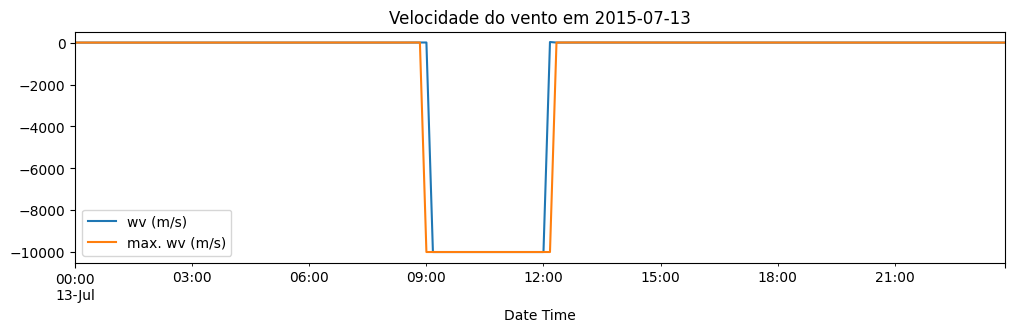

In [15]:
ax = df.loc[
    df["Date Time"].dt.date == datetime.date(2015, 7, 13), ["Date Time", "wv (m/s)"]
].plot(x="Date Time", y="wv (m/s)", figsize=(12, 3))

ax.set_title("Velocidade do vento em 2015-07-13")
df.loc[
    df["Date Time"].dt.date == datetime.date(2015, 7, 13),
    ["Date Time", "max. wv (m/s)"],
].plot(x="Date Time", y="max. wv (m/s)", ax=ax)

Para tratar esses valores, vamos substituir os valores -9999 por `np.nan` e em seguida vamos preencher os valores nulos com a média móvel dos 5 registros anteriores e posteriores. A média móvel é uma técnica de suavização de séries temporais que calcula a média dos valores anteriores e posteriores a um determinado ponto.

In [16]:
df = df.replace(-9999, np.nan)
df.isnull().sum()

Date Time           0
p (mbar)            0
T (degC)            0
Tpot (K)            0
Tdew (degC)         0
rh (%)              0
VPmax (mbar)        0
VPact (mbar)        0
VPdef (mbar)        0
sh (g/kg)           0
H2OC (mmol/mol)     0
rho (g/m**3)        0
wv (m/s)           18
max. wv (m/s)      20
wd (deg)            0
dtype: int64

In [17]:
df["wv (m/s)"].fillna(df["wv (m/s)"].rolling(24, min_periods=1).mean(), inplace=True)
df["max. wv (m/s)"].fillna(
    df["max. wv (m/s)"].rolling(24, min_periods=1).mean(), inplace=True
)

<Axes: title={'center': 'Velocidade do vento em 2015-07-13'}, xlabel='Date Time'>

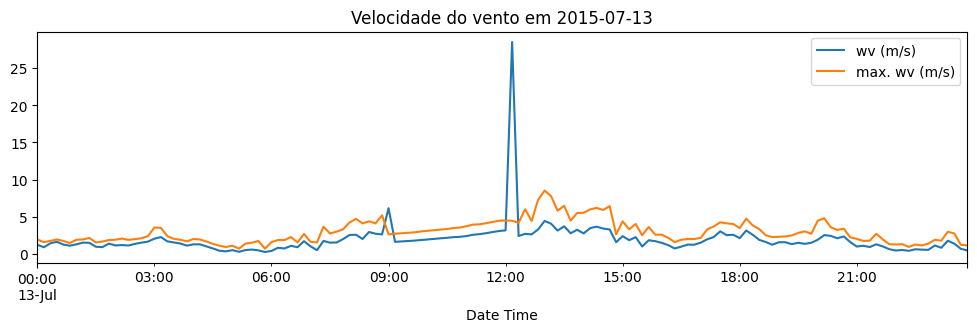

In [18]:
ax = df.loc[
    df["Date Time"].dt.date == datetime.date(2015, 7, 13), ["Date Time", "wv (m/s)"]
].plot(x="Date Time", y="wv (m/s)", figsize=(12, 3))

ax.set_title("Velocidade do vento em 2015-07-13")
df.loc[
    df["Date Time"].dt.date == datetime.date(2015, 7, 13),
    ["Date Time", "max. wv (m/s)"],
].plot(x="Date Time", y="max. wv (m/s)", ax=ax)

## 2. Exploração dos dados

Na seção anterior, vimos que a maior parte das colunas possui a média e a mediana próximas, o que pode indicar que as distribuições são aproxidamente simétricas. Nessa seção, desejamos verificar a forma das distribuições das variáveis usando as medidas de assimetria e visualizando os histogramas.

A assimetria é uma medida de simetria da distribuição, se a assimetria é 0, a distribuição é simétrica, se a assimetria é positiva, a distribuição é assimétrica para a direita caso contrário, a distribuição é assimétrica para a esquerda.

<div align="center">

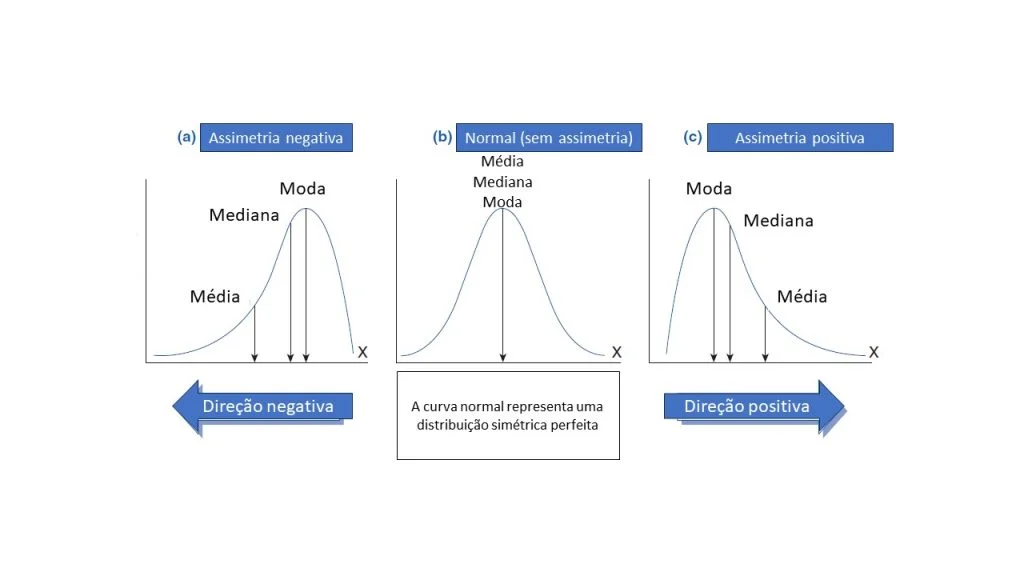
</div>

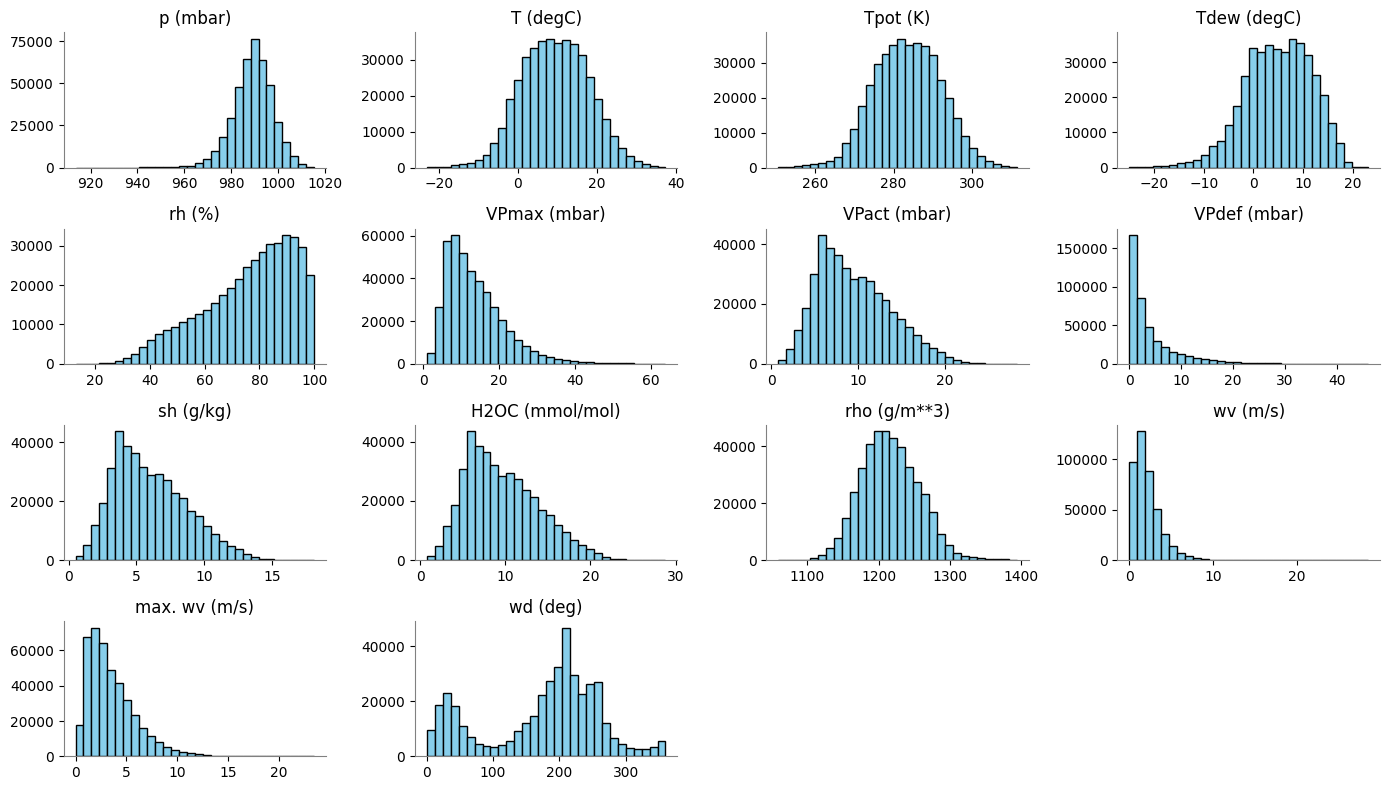

In [29]:
ax = df.drop(columns=["Date Time"]).hist(
    figsize=(14, 8),
    grid=False,
    bins=30,
    color="skyblue",
    edgecolor="black",
)

# Remove os eixos superior e direito
for sub_ax in ax.flatten():
    sub_ax.spines["top"].set_visible(False)
    sub_ax.spines["right"].set_visible(False)

    sub_ax.spines["left"].set_color("gray")
    sub_ax.spines["bottom"].set_color("gray")

plt.tight_layout()
plt.show()

In [30]:
df_desc = pd.concat(
    [
        df.drop(columns=["Date Time"]).mode().rename(index={0: "mode"}).round(0),
        df.drop(columns=["Date Time"]).agg(["mean", "median"]).round(0),
        df.drop(columns=["Date Time"]).skew().to_frame("skewness").round(0).T,
    ]
)

df_desc

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
mode         991.0       8.0     283.0          8.0   100.0          11.0   
mean         989.0       9.0     283.0          5.0    76.0          14.0   
median       990.0       9.0     283.0          5.0    79.0          12.0   
skewness      -0.0      -0.0      -0.0         -0.0    -1.0           1.0   

          VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
mode               6.0           0.0        4.0              6.0   
mean              10.0           4.0        6.0             10.0   
median             9.0           2.0        6.0              9.0   
skewness           1.0           2.0        1.0              1.0   

          rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
mode            1223.0       1.0            2.0     211.0  
mean            1216.0       2.0            4.0     175.0  
median          1214.0       2.0            3.0     198.0  
skewness           0.0       1.0            1.0      -0.0

Na tabela e nos gráficos, ao calcular a assimetria com o método `skew()`, vemos que as variáveis `p (mbar)`, `T (degC)`, `Tpot (K)`, `Tdew (degC)`, `rho (g/m**3)` e `wd(deg)` são distribuições aproximadamente simétricas, pois a assimetria calculada é próxima de 0. A variável `rh (%)` é a única que possui uma assimetria a esquerda, com o coeficiente de assimetria negativo. As demais variáveis possuem o coeficiente maior que 0, indicando uma assimetria a direita.

## 2. Visualização dos dados

In [7]:
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as px
import holoviews as hv
from holoviews import opts
from bokeh.models import HoverTool
from IPython.display import HTML, display

# Default visual settings
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 150

In [8]:
df_temp_ts = df[["Date Time", "T (degC)"]].set_index("Date Time")
df_temp_ts.head()

T (degC)
Date Time                    
2009-01-01 00:10:00     -8.02
2009-01-01 00:20:00     -8.41
2009-01-01 00:30:00     -8.51
2009-01-01 00:40:00     -8.31
2009-01-01 00:50:00     -8.27

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
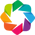

:Layout
   .Curve.I   :Curve   [Date Time]   (T (degC))
   .Curve.II  :Curve   [Date Time]   (T (degC))
   .Curve.III :Curve   [Date Time]   (T (degC))
   .Curve.IV  :Curve   [Date Time]   (T (degC))

In [9]:
hv.extension("bokeh")

hourly = hv.Curve(df_temp_ts.resample("H").mean()).opts(
    opts.Curve(
        title="Temperatura média do ar a cada hora",
        xlabel="",
        ylabel="T (degC)",
        width=700,
        height=300,
        tools=["hover"],
        show_grid=True,
    )
)

daily = hv.Curve(df_temp_ts.resample("D").mean()).opts(
    opts.Curve(
        title="Temperatura média do ar por dia",
        xlabel="",
        ylabel="T (degC)",
        width=700,
        height=300,
        tools=["hover"],
        show_grid=True,
    )
)

weekly = hv.Curve(df_temp_ts.resample("W").mean()).opts(
    opts.Curve(
        title="Temperatura média do ar por semana",
        xlabel="Date",
        ylabel="T (degC)",
        width=700,
        height=300,
        tools=["hover"],
        show_grid=True,
    )
)

monthly = hv.Curve(df_temp_ts.resample("M").mean()).opts(
    opts.Curve(
        title="Temperatura média do ar por mês",
        xlabel="Date",
        ylabel="T (degC)",
        width=700,
        height=300,
        tools=["hover"],
        show_grid=True,
    )
)


(hourly + daily + weekly + monthly).opts(shared_axes=False).cols(1)

Nos gráficos acima, podemos notar que há uma repetição anual entre dos valores da temperatura do ar.

## 3. Análise estatísticas

### 3.1 Teste normalidade

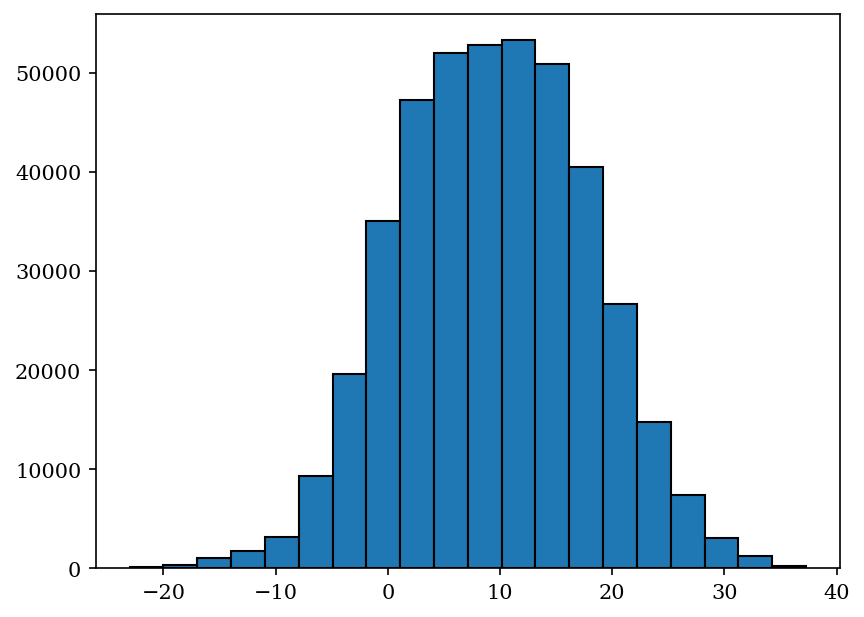

In [10]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt


plt.hist(df["T (degC)"], edgecolor="black", bins=20)
plt.show()

Ao realizar o plot do histograma, a distribuição de temperatura, parece aproxidamente normal, para validar se a distribuição é gaussiana, usamos o teste de normalidade a seguir.

In [11]:
# Anderson-Darling Normality Test
from scipy.stats import anderson

result = anderson(df["T (degC)"])
print("stat=%.3f" % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print("Provavelmente guassina no nível %.1f%%" % (sl))
    else:
        print("Provavelmente não gaussiana no nível %.1f%%" % (sl))

stat=243.936
Provavelmente não gaussiana no nível 15.0%
Provavelmente não gaussiana no nível 10.0%
Provavelmente não gaussiana no nível 5.0%
Provavelmente não gaussiana no nível 2.5%
Provavelmente não gaussiana no nível 1.0%


### 3.2 Teste de correlação

/tmp/ipykernel_64/3266096845.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method="spearman")


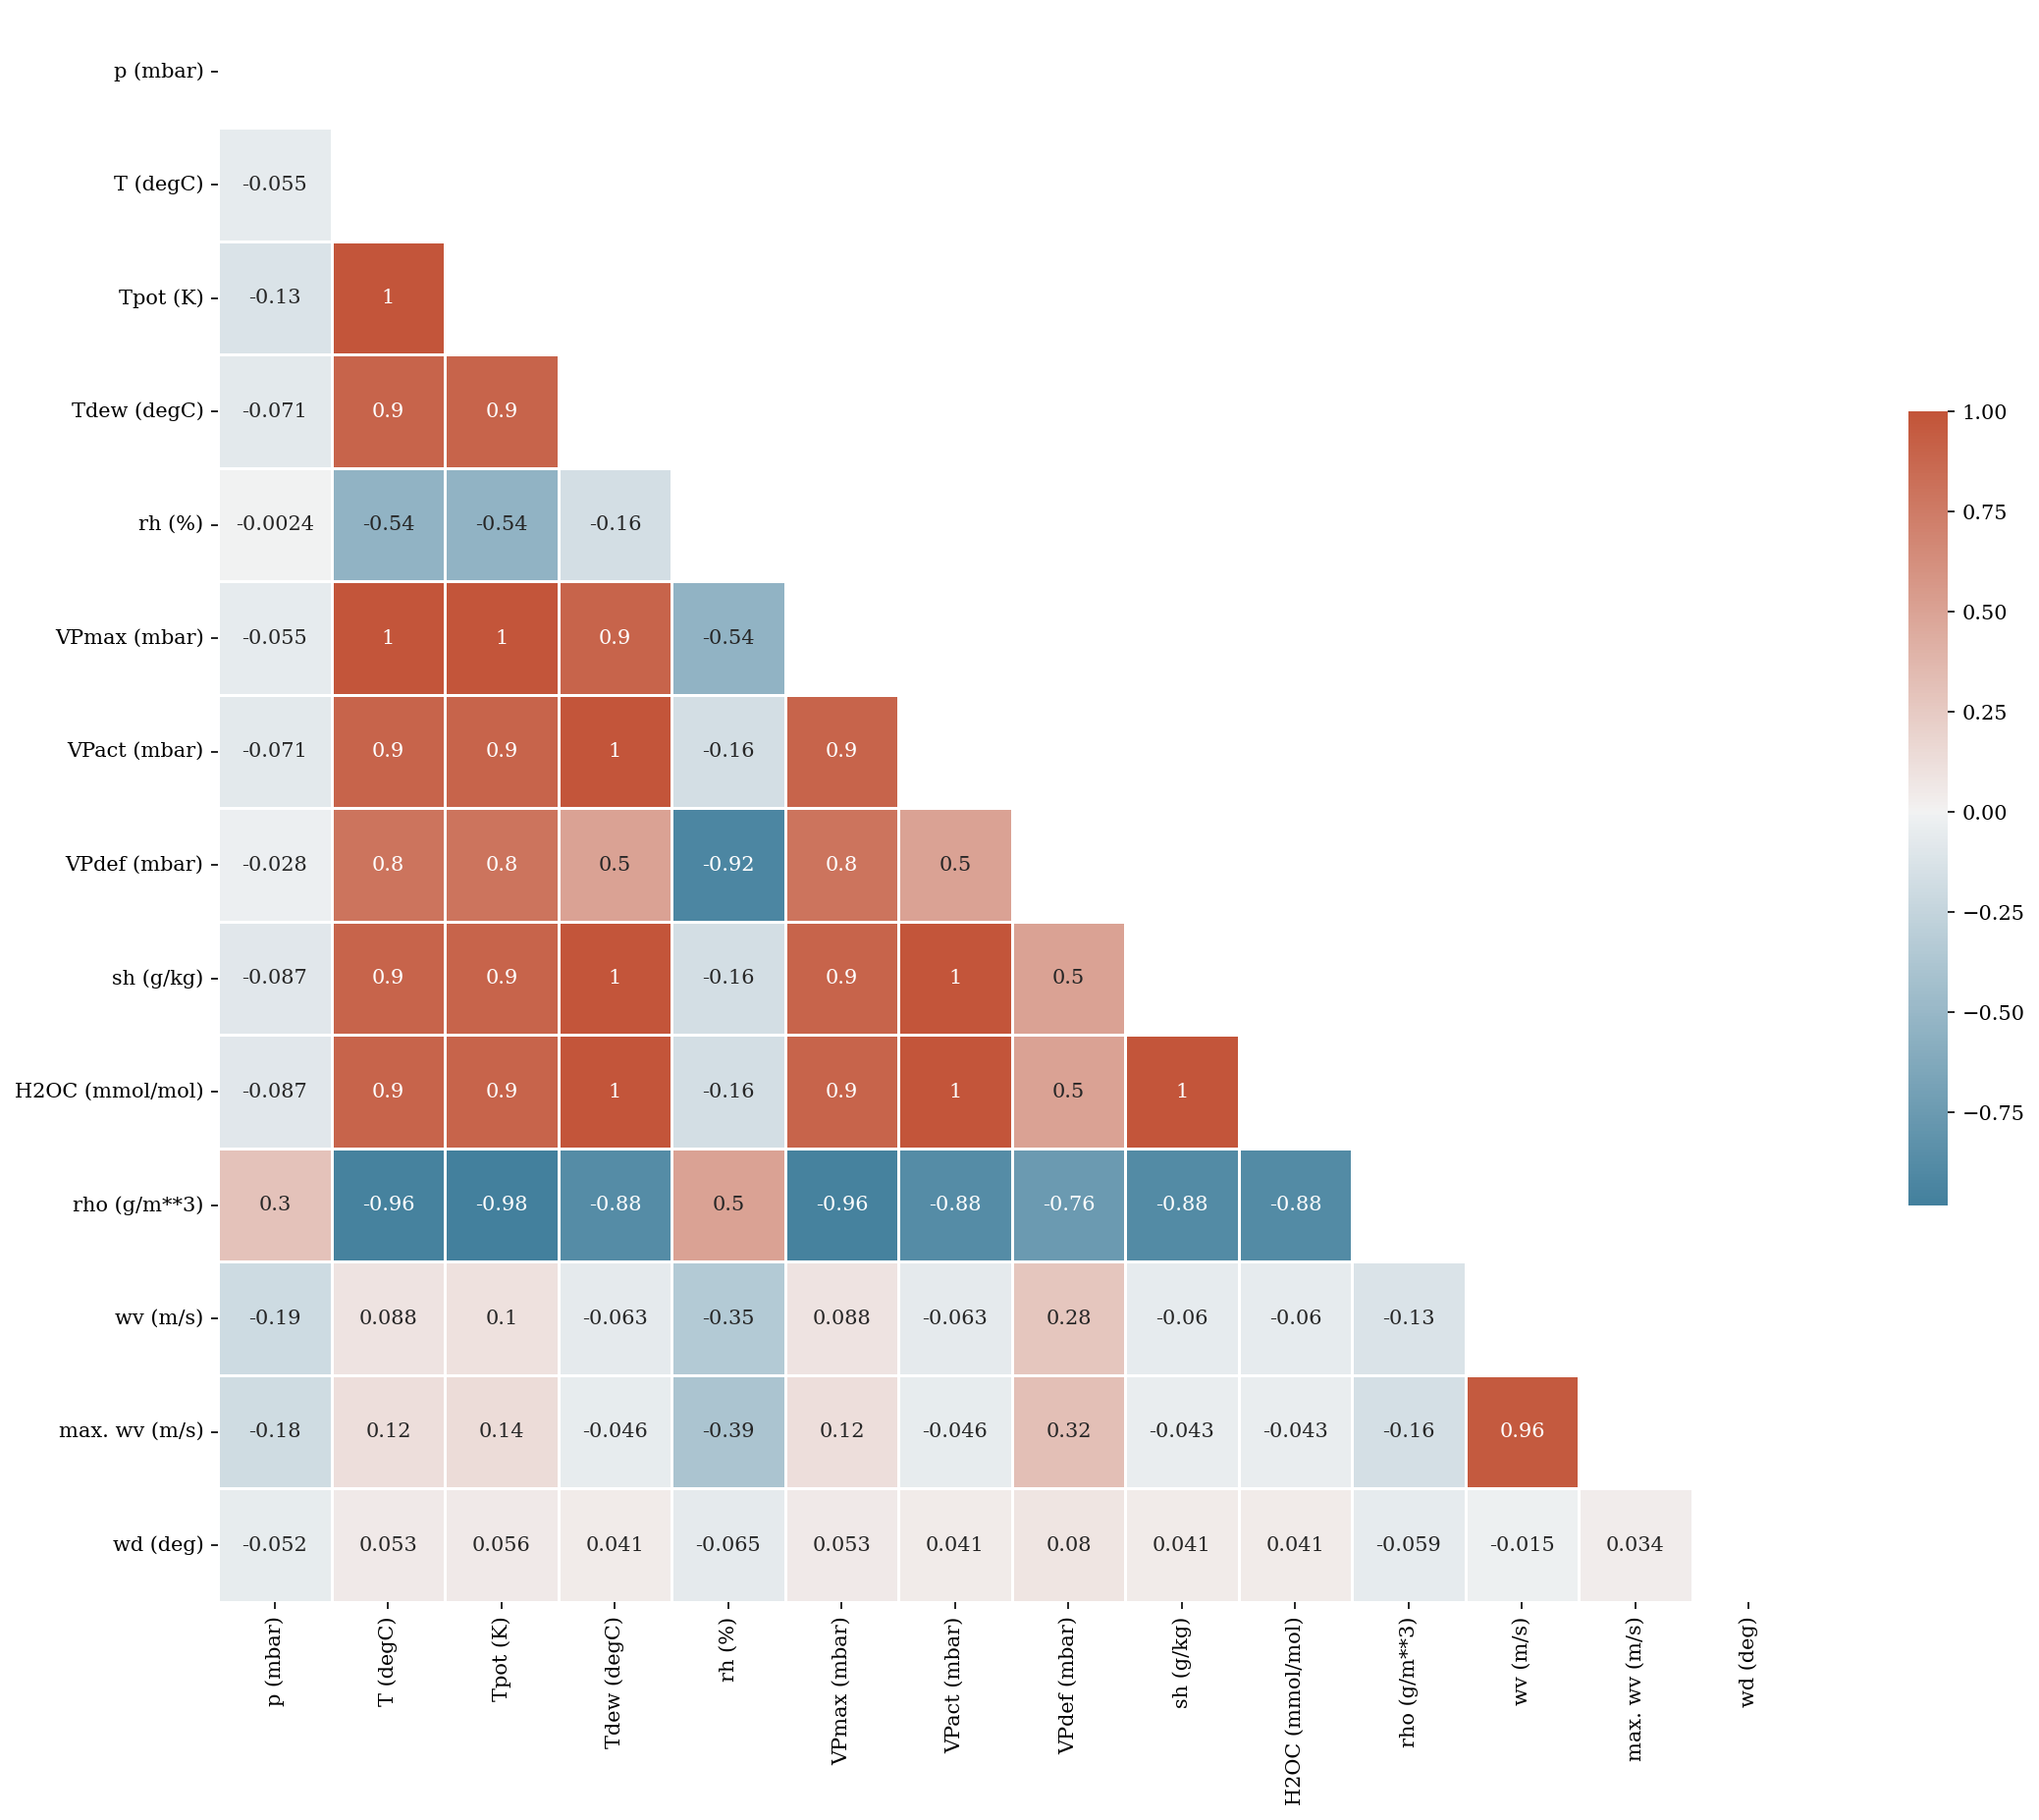

In [12]:
import numpy as np

# Obtém a correlação entre as colunas numéricas de nosso conjunto
corr = df.corr(method="spearman")

# Gera uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define uma figura do matplotlib
f, ax = plt.subplots(figsize=(18, 14))

# Gera um colormap divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenha um heatmap com a máscara e a correta proporção
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    center=0,
    annot=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.show()

Vemos que há uma correlação positiva forte (perfeita) entre a variável de interesse **T (degC)** e **Tpot(K)**, ou seja, quando a variável Tpot(K) aumenta, os valores de T(degC) também aumentam.

### 3.3 Teste Estacionário

In [13]:
# Kwiatkowski-Phillips-Schmidt-Shin
from statsmodels.tsa.stattools import kpss

stat, p, lags, crit = kpss(df["T (degC)"])
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
    print("Provavelmente estacionária")
else:
    print("Provavelmente não estacionária")

stat=2.054, p=0.010
Provavelmente não estacionária


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [14]:
6 * (24 * 30)  # 1 mês (cada hora tem 6 registros)

4320

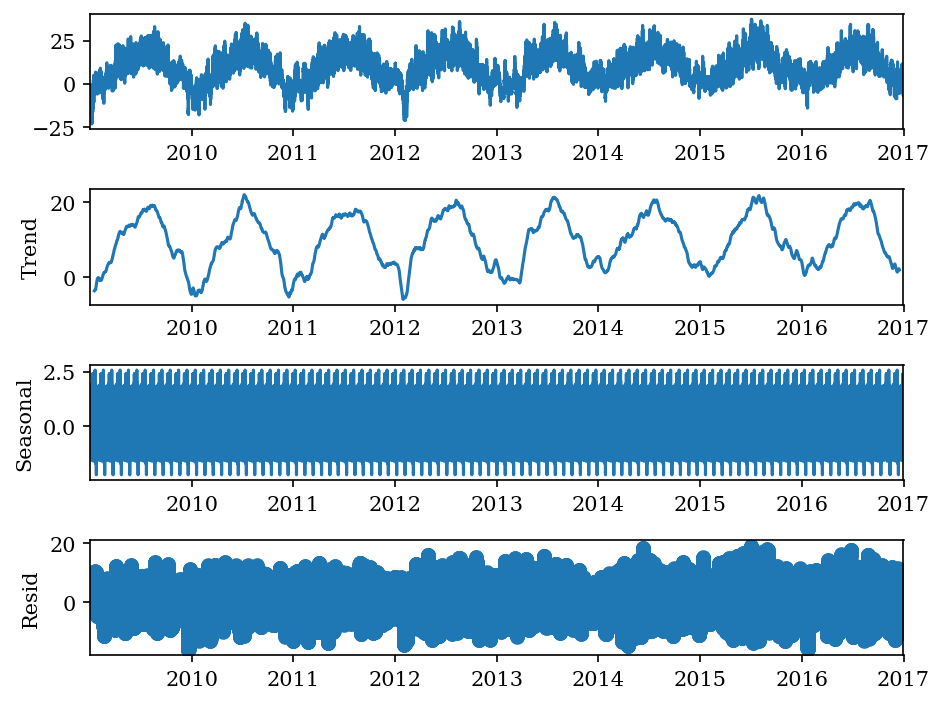

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = df_temp_ts.copy()

decompose_result_mult = seasonal_decompose(analysis, model="additive", period=4320)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()